<a href="https://colab.research.google.com/github/Armanskij/EBAC_Studies/blob/main/Profissao_Analista_de_dados_M15_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
# gráfico do exercício 1

diamonds = data['price']
diamonds

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

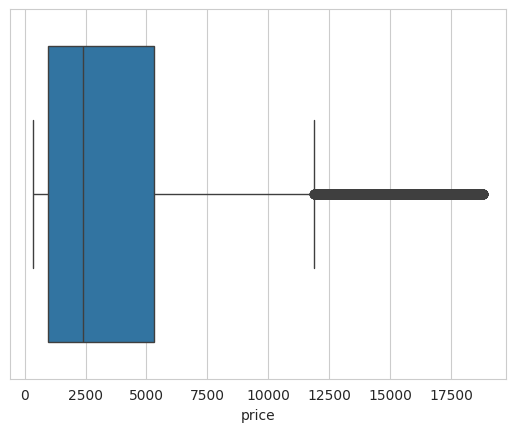

In [27]:
with sns.axes_style('whitegrid'):
  grafico1 = sns.boxplot(x=data['price'])

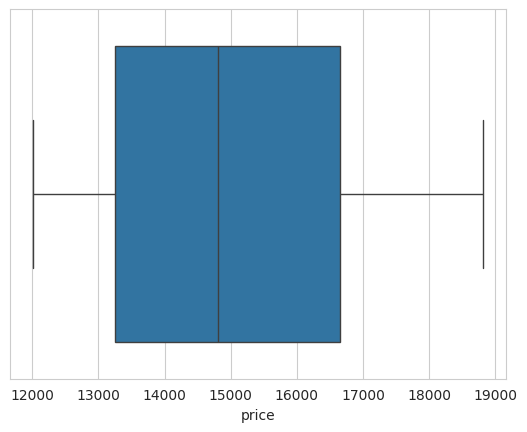

In [28]:
data = data[['price']]
data = data.query('price > 12000')

with sns.axes_style('whitegrid'):
  grafico1 = sns.boxplot(x=data['price'])

#grafico1.set_axis_labels('Preço')

**Insight do gráfico 1**:
> Em uma primeira vista notamos que 3/4 dos diamante tem seu preço próximo de USD 5,000.

> Agora focando nos preços outliers variando entre USD 12,000 e 19,000 vemos que metade deles (2° ao 3° quartil) estão entre USD 13,200 e 16,500.

>De modo geral os preços dos diamantes estão condensados em torno de USD 2,500 porém há muitos preços outliers que giram em torno de USD 15,000. Mostrando asssim que os preços de diamantes variam bastante, tendo grande parte deles de um valor mais baixos, e alguns já apresentam um valor bem elevado.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


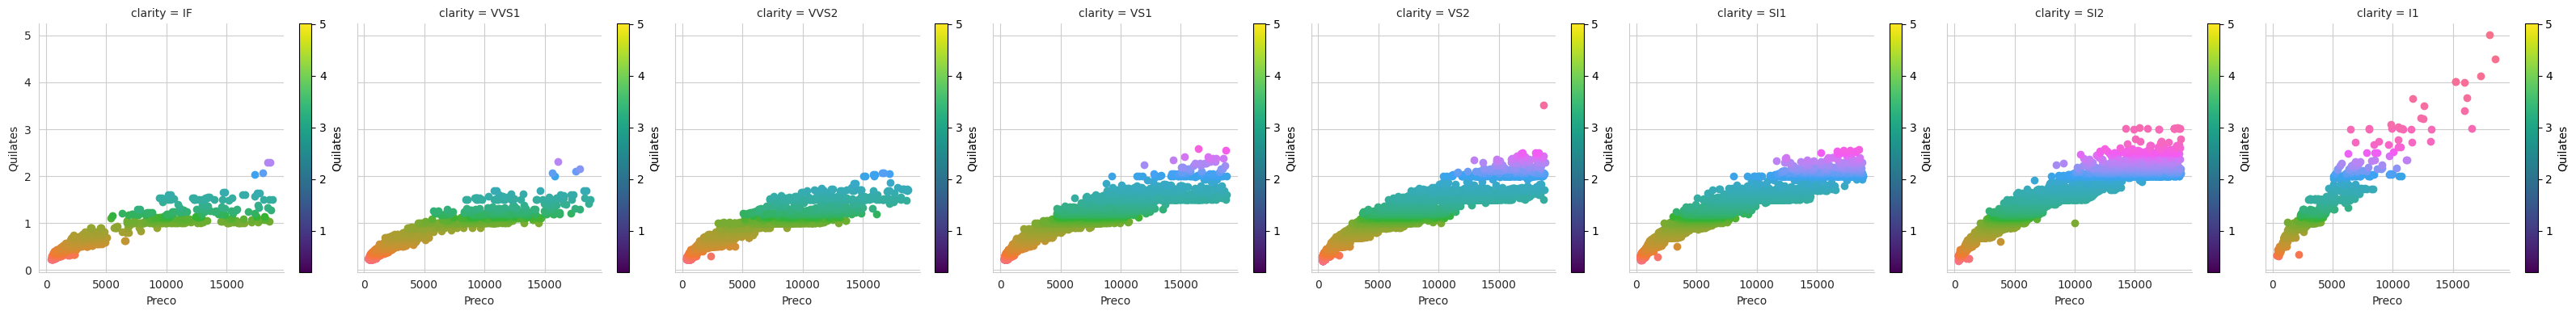

In [30]:
interesse = data[['carat', 'clarity', 'price']]

with sns.axes_style('whitegrid'):
    grafico2 = sns.FacetGrid(\
                            data=interesse,\
                            col='clarity',\
                            hue='carat',\
                            height=4)

grafico2.map(plt.scatter, 'price', 'carat')

# adicionando maximo e minimo para escala de cores
min_carat = interesse['carat'].min()
max_carat = interesse['carat'].max()

# criando escala de cores para facilitar compreencao
colors = sns.color_palette("viridis", as_cmap=True)
sm = plt.cm.ScalarMappable\
 (cmap=colors, norm=plt.Normalize(vmin=min_carat, vmax=max_carat))
sm.set_array([])

# adicionado escala ao lado de cada mini grafico
for ax in grafico2.axes.flat:
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label('Quilates')

grafico2.set_axis_labels('Preco', 'Quilates') #renomeando eixos

plt.show()


In [31]:
# gráfico do exercício 2

diamonds = data[['price','clarity','carat']]
df =pd.DataFrame(diamonds)
soma=df['clarity'].value_counts()
soma

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

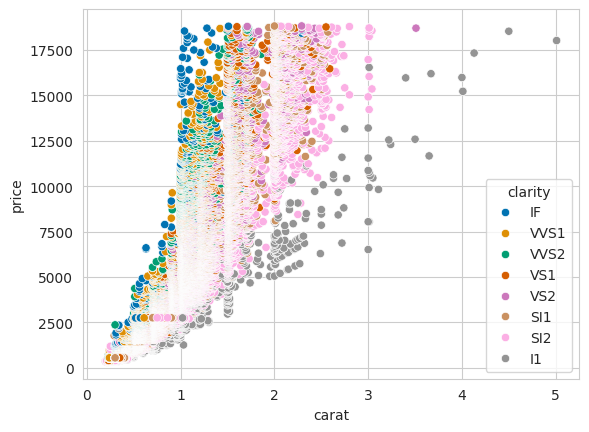

In [32]:
with sns.axes_style('whitegrid'):
  grafico2 = sns.scatterplot(data=diamonds, x='carat', y='price', hue='clarity', palette='colorblind')

**Insight do gráfico 2**:
> O gráfico revela uma correlação entre o preço e o peso do diamante, agrupado por transparência. Diamantes mais pesados geralmente têm preços mais altos, mas a transparência influencia a relação.

>Diamantes transparentes mostram uma tendência linear mais clara entre peso e preço, enquanto os menos transparentes exibem maior dispersão nos preços, sugerindo a influência de outros fatores.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [33]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


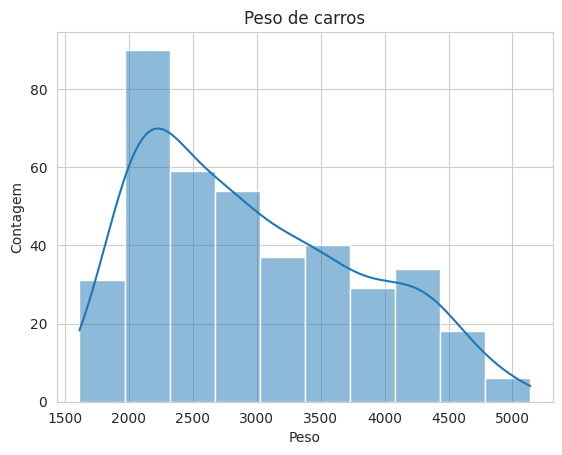

In [34]:
# gráfico do exercício 3

cars = data[['weight']]

with sns.axes_style('whitegrid'):
  grafico3 = sns.histplot(data=data, x='weight', kde=True)
  grafico3.set(title='Peso de carros', xlabel='Peso', ylabel='Contagem')

**Insight do gráfico 3**:
>A distruibuição de peso dos carros caracteriza-se pela assimetria positiva (maior concentração de valores na zona de menores valores), mostrando que a maioria dos carros tem seu peso mais baixo,

>Com o aumento de peso o número de carros tende a diminuir, porém ainda se encontram muitos modelos de carros grandes.

>Esse gráfico indica que existe uma grande variedade de modelos de carros com os mais diversos pesos, onde a maioria dos carros tem seu peso por volta de 2000 a 2500 (carros utilitários) e indo até carros mais pesados (SUVs e caminhonetes).

---